## k-means
* k-means法は非階層クラスタリングの代表的な手法
* 以下ではwineデータの正解ラベルを取り除きk-means法により分類したものと正解ラベルを、主成分分析で二次元に圧縮し可視化する。

<a href="https://colab.research.google.com/github/ToumaTanaka/Data_Science/blob/main/Tabel_Data/Machine_Learning/Unsupervised_Learning/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#以下がk-means法に必要なコード
from sklearn import cluster

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [4]:
#データの読み込み
d = datasets.load_wine()

#データを標準化
xs = scale(d.data)

#k-means法の設定、k=3で10種類の初期値を試す
km = cluster.KMeans(n_clusters=3, n_init=10)
#k-means法の実行
km.fit(xs)
cl = km.labels_

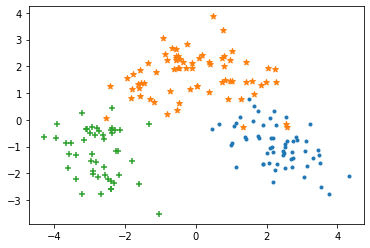

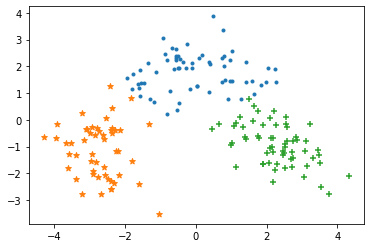

In [15]:
#データを主成分分析により二次元に縮約し、グラフ上に可視化する
pc = PCA(n_components=2)
pc.fit(xs)
#主成分スコアの計算
pxs = pc.transform(xs)

#もともとのクラスラベルのプロット
mk = ['.','*','+']
#np.arange(3)は等差数列を生成
for i in np.arange(3):
  idx = (d.target==i)
  plt.scatter(pxs[idx,0],pxs[idx,1],marker=mk[i])
plt.show()  

#k-means法による分類のプロット
for i in np.arange(3):
  idx = (cl == i)
  plt.scatter(pxs[idx,0],pxs[idx,1],marker=mk[i])
plt.show()